<a href="https://colab.research.google.com/github/jgcr7/Data-Science-Study/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF 1340 Final Project (LEC201) Group 1

Henry Zhang, Junchen Gu, Yu Tian

Income Rates, Career Satisfaction, and Career Choice Factors Among University Students

Link to the Google Colab: https://colab.research.google.com/drive/1VuRylZijCRaKE22FFCMj2jgi35gIvuDy?usp=sharing

**[Employee Satisfaction Survey Data](https://www.kaggle.com/datasets/redpen12/employees-satisfaction-analysis/data)**

In [ ]:
# Import the 'drive' module from the 'google.colab' package to enable Google Drive integration.
# Then, mount Google Drive to the '/drive' directory within the Colab environment.
# The 'force_remount=True' parameter ensures that the Drive is remounted even if it was previously mounted.

from google.colab import drive
drive.mount('/drive', force_remount=True)

# Change the current working directory to the specified folder within Google Drive,
# where you can save and load your Colab notebooks or files.
%cd '/drive/MyDrive/UofT/UT MI 2024 F/1340 Python/1340 Final Porject'

Mounted at /drive
/drive/MyDrive/UofT/UT MI 2024 F/1340 Python/1340 Final Porject


**Part 1: Data Cleaning**

Step 1: Data Inspection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import skew, kurtosis
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

employee_attr_df = pd.read_csv('Employee Attrition.csv')

In [ ]:
# Load and inspect the dataset
print(employee_attr_df.info())  # Check data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB
None


In [ ]:
employee_attr_df.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)

Step 2: Identify and handle missing data (remove, impute, or flag missing values).

In [ ]:
# Check for missing values
print(employee_attr_df.isnull().sum())

Emp ID                   788
satisfaction_level       788
last_evaluation          788
number_project           788
average_monthly_hours    788
time_spend_company       788
Work_accident            788
promotion_last_5years    788
dept                     788
salary                   788
dtype: int64


Identify and calculate the proportion of missing values for each variable.

In [ ]:
# Check for missing values
missing_values = employee_attr_df.isnull().sum()

# Calculate the proportion of missing values for each variable
missing_values_proportion = missing_values / len(employee_attr_df) * 100

# Display the missing values and their proportions
missing_values_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Proportion (%)': missing_values_proportion
})

print(missing_values_report)


                       Missing Values  Proportion (%)
Emp ID                            788        4.991449
satisfaction_level                788        4.991449
last_evaluation                   788        4.991449
number_project                    788        4.991449
average_monthly_hours             788        4.991449
time_spend_company                788        4.991449
Work_accident                     788        4.991449
promotion_last_5years             788        4.991449
dept                              788        4.991449
salary                            788        4.991449


Since we have 15787 entries, we can afford to drop the NA entries.

In [ ]:
# Remove rows with missing values
employee_attr_df = employee_attr_df.dropna()

In [ ]:
# Double check if there is still any missing data
print("Missing Data: ")
print(employee_attr_df.isnull().sum())

Missing Data: 
Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64


Step 3: Detect and handle outliers

In [ ]:
# Columns to check for outliers
numeric_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
                'average_monthly_hours', 'time_spend_company']

# Detect and handle outliers for each numeric column
for col in numeric_cols:
    Q1 = employee_attr_df[col].quantile(0.25)
    Q3 = employee_attr_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #cRemove outliers (rows outside the bounds)
    employee_attr_df = employee_attr_df[(employee_attr_df[col] >= lower_bound) & (employee_attr_df[col] <= upper_bound)]


**Part 2: Descriptive Analytics**

**2.1 Calculate summary statistics (mean, median, mode, standard deviation, etc.).**

In [ ]:
print(employee_attr_df.info())
print(employee_attr_df.describe())  # Summary statistics for numerical columns

<class 'pandas.core.frame.DataFrame'>
Index: 13717 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 13717 non-null  float64
 1   satisfaction_level     13717 non-null  float64
 2   last_evaluation        13717 non-null  float64
 3   number_project         13717 non-null  float64
 4   average_monthly_hours  13717 non-null  float64
 5   time_spend_company     13717 non-null  float64
 6   Work_accident          13717 non-null  float64
 7   promotion_last_5years  13717 non-null  float64
 8   dept                   13717 non-null  object 
 9   salary                 13717 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB
None
             Emp ID  satisfaction_level  last_evaluation  number_project  \
count  13717.000000        13717.000000     13717.000000    13717.000000   
mean    7273.189692            0.611729         0.714338       

**2.2 Explore and describe the distribution of numerical data using skewness and kurtosis.**

In [ ]:


# Select numerical columns
numerical_columns = employee_attr_df.select_dtypes(include=['float64']).columns

# Calculate skewness and kurtosis for each numerical column
distribution_stats = pd.DataFrame({
    'Skewness': employee_attr_df[numerical_columns].apply(skew),
    'Kurtosis': employee_attr_df[numerical_columns].apply(kurtosis)
})

print(distribution_stats)


                       Skewness   Kurtosis
Emp ID                 0.071384  -1.146394
satisfaction_level    -0.475281  -0.646521
last_evaluation       -0.003237  -1.248369
number_project         0.366160  -0.473443
average_monthly_hours  0.091190  -1.137737
time_spend_company     0.529180  -0.438701
Work_accident          2.056274   2.228262
promotion_last_5years  7.360161  52.171975


From these skewness and kurtosis values, we can conclude that most variables exhibit relatively low skewness and kurtosis, suggesting they are close to normally distributed, with minor deviations. However, certain variables deviate significantly: `Work_accident` and `promotion_last_5years` both have high positive skewness (2.06 and 7.36, respectively), indicating that their distributions are heavily right-skewed, with most observations near zero but a few much higher values. Similarly, their high kurtosis values (2.23 and 52.17) suggest the presence of extreme outliers, particularly for `promotion_last_5years`, which exhibits an exceptionally high kurtosis. These findings indicate that `Work_accident` and `promotion_last_5years` are not normally distributed and contain extreme values, likely reflecting the rarity of work accidents and promotions over the past five years.

**2.3 Generate frequency distributions for categorical data.**

In [ ]:
# Frequency distribution for categorical columns
categorical_columns = ['dept', 'salary']

for column in categorical_columns:
    print(f"Frequency distribution for {column}:")
    print(employee_attr_df[column].value_counts())
    print("\n")


Frequency distribution for dept:
dept
sales          3739
technical      2540
support        2082
IT             1137
product_mng     827
marketing       765
RandD           735
accounting      712
hr              692
management      488
Name: count, dtype: int64


Frequency distribution for salary:
salary
low       6831
medium    5824
high      1062
Name: count, dtype: int64




From the frequency distribution for departments, we can observe that the largest number of employees work in *sales* (3,739), followed by *technical* (2,540) and *support* (2,082) roles. Departments like *management* (488) and *hr* (692) have considerably fewer employees. This suggests that the organization may be more operationally focused, with a strong emphasis on sales, technical, and support functions. Regarding salary distribution, the majority of employees fall into the *low* salary category (6,831), followed by *medium* salary (5,824), with only a small portion of employees in the *high* salary group (1,062). This distribution indicates that higher salaries are less common, possibly limited to senior or specialized roles, while a substantial portion of the workforce is in lower-paying positions.

**2.4 Segment the data by relevant categories (e.g., by dept) to identify trends.**

In [ ]:
# Mean satisfaction level by department
mean_satisfaction_by_dept = employee_attr_df.groupby('dept')['satisfaction_level'].mean()

print("\nMean satisfaction level by department:")
print(mean_satisfaction_by_dept)



Mean satisfaction level by department:
dept
IT             0.616711
RandD          0.631510
accounting     0.578315
hr             0.597673
management     0.615676
marketing      0.622458
product_mng    0.617098
sales          0.611837
support        0.615740
technical      0.607783
Name: satisfaction_level, dtype: float64


The mean satisfaction levels across departments reveal some minor differences, with *R&D* having the highest average satisfaction level (0.6315), followed by *marketing* (0.6225) and *product management* (0.6171). Departments like *accounting* (0.5783) and *HR* (0.5977) have relatively lower satisfaction levels, indicating that employees in these roles may experience slightly lower job satisfaction. Overall, the satisfaction levels are relatively close across departments, with no extreme differences, suggesting that organizational factors influencing job satisfaction may be fairly consistent throughout the company, regardless of the specific department.

In [ ]:
# Mean satisfaction level grouped by salary
mean_satisfaction_by_salary = employee_attr_df.groupby('salary')['satisfaction_level'].mean()

# Print the results
print("Mean satisfaction level by salary:")
print(mean_satisfaction_by_salary)


Mean satisfaction level by salary:
salary
high      0.649718
low       0.597803
medium    0.621135
Name: satisfaction_level, dtype: float64


<ipython-input-15-608a9dcab853>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="salary", y="satisfaction_level", data=employee_attr_df, palette="Set2")


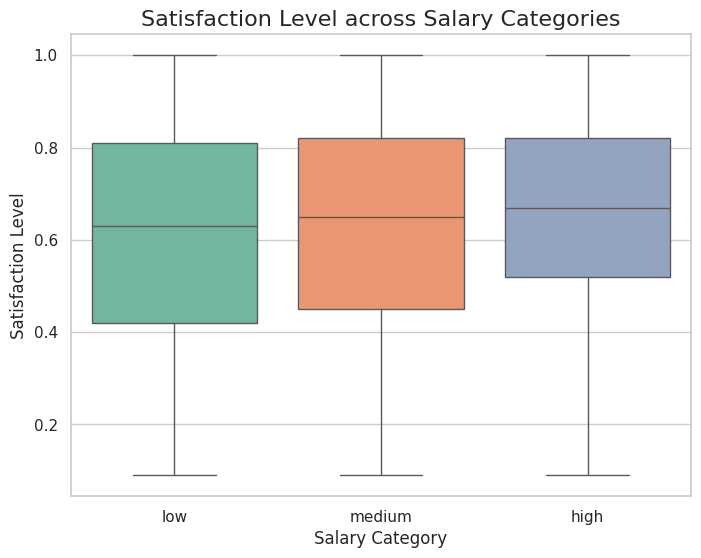

In [ ]:
sns.set(style="whitegrid")

# Create a boxplot to visualize satisfaction_level across different salary categories
plt.figure(figsize=(8, 6))
sns.boxplot(x="salary", y="satisfaction_level", data=employee_attr_df, palette="Set2")

# Add labels and title
plt.title('Satisfaction Level across Salary Categories', fontsize=16)
plt.xlabel('Salary Category', fontsize=12)
plt.ylabel('Satisfaction Level', fontsize=12)

# Show the plot
plt.show()

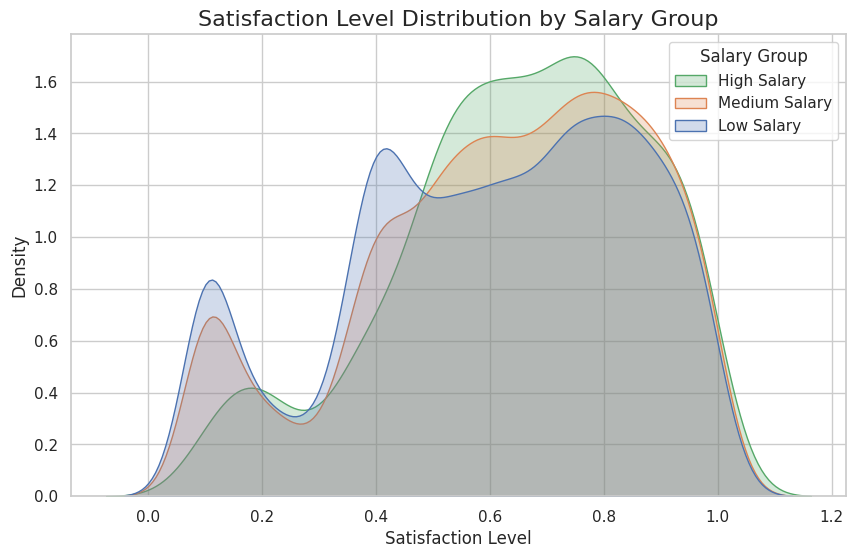

In [ ]:
plt.figure(figsize=(10, 6))

# Plot the distribution of satisfaction level for each salary group
sns.kdeplot(data=employee_attr_df, x="satisfaction_level", hue="salary", fill=True, common_norm=False, palette="deep")

# Set the title and labels
plt.title("Satisfaction Level Distribution by Salary Group", fontsize=16)
plt.xlabel("Satisfaction Level", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Improve the legend to provide clearer group names
plt.legend(title='Salary Group', loc='upper right', labels=['High Salary', 'Medium Salary', 'Low Salary'])

# Show the plot
plt.show()


In [ ]:
# Calculate the variance of satisfaction levels for each salary group
variance_satisfaction = employee_attr_df.groupby('salary')['satisfaction_level'].var()

# Calculate Q1, Q3, and IQR for each salary group
Q1 = employee_attr_df.groupby('salary')['satisfaction_level'].quantile(0.25)
Q3 = employee_attr_df.groupby('salary')['satisfaction_level'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Merge the lower_bound and upper_bound values with the original DataFrame for comparison
employee_attr_df['lower_bound'] = employee_attr_df['salary'].map(lower_bound)
employee_attr_df['upper_bound'] = employee_attr_df['salary'].map(upper_bound)

# Check if satisfaction_level is an outlier
outliers = (employee_attr_df['satisfaction_level'] < employee_attr_df['lower_bound']) | \
           (employee_attr_df['satisfaction_level'] > employee_attr_df['upper_bound'])

# Count outliers by salary group
outlier_count = outliers.groupby(employee_attr_df['salary']).sum()

# Display the results
print("Variance of Satisfaction Level by Salary Group:")
print(variance_satisfaction)
print("\nNumber of Outliers by Salary Group:")
print(outlier_count)


Variance of Satisfaction Level by Salary Group:
salary
high      0.048075
low       0.064576
medium    0.059937
Name: satisfaction_level, dtype: float64

Number of Outliers by Salary Group:
salary
high      0
low       0
medium    0
dtype: int64


The mean satisfaction level by salary indicates a positive relationship between salary level and job satisfaction. The high salary group has the highest mean satisfaction level (0.6497), followed by the medium salary group (0.6211), while the low salary group has the lowest mean satisfaction level (0.5978). The high salary group also exhibits the least variability in satisfaction, suggesting that satisfaction levels are more homogeneous. In contrast, the low salary group has higher variability, indicating a wider range of satisfaction levels among its employees. This trend suggests that higher compensation may be associated with increased job satisfaction, potentially due to the financial security and perceived value or recognition that comes with higher pay. However, other factors could also influence satisfaction, so further analysis would be useful to explore the complete picture.

**Part 3: Diagnostic Analytics**

**3.1 Perform correlation analysis to assess relationships between interesting variables.**

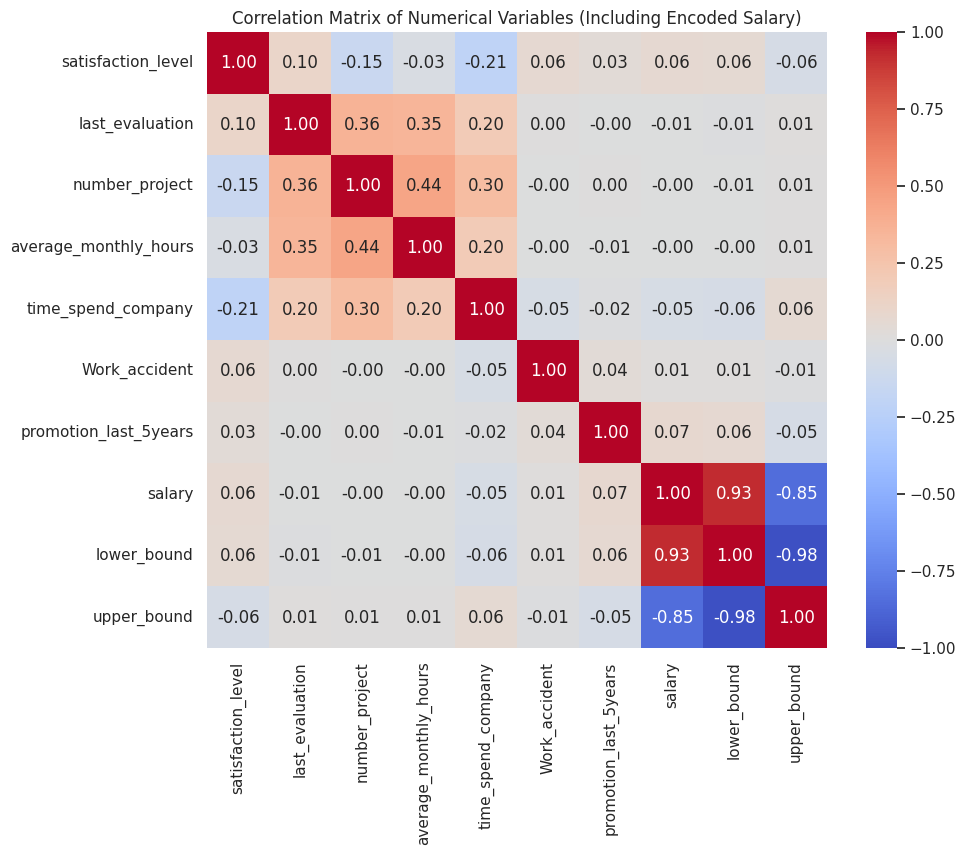

In [ ]:
# Convert salary levels to numeric values
employee_attr_corr_df = employee_attr_df.copy()
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
employee_attr_corr_df['salary'] = employee_attr_corr_df['salary'].map(salary_mapping)

# Drop non-numeric columns (Emp ID and dept) for correlation analysis
numerical_df = employee_attr_corr_df.drop(columns=['Emp ID', 'dept'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables (Including Encoded Salary)')
plt.show()

**Satisfaction Level vs. Time Spent at Company**

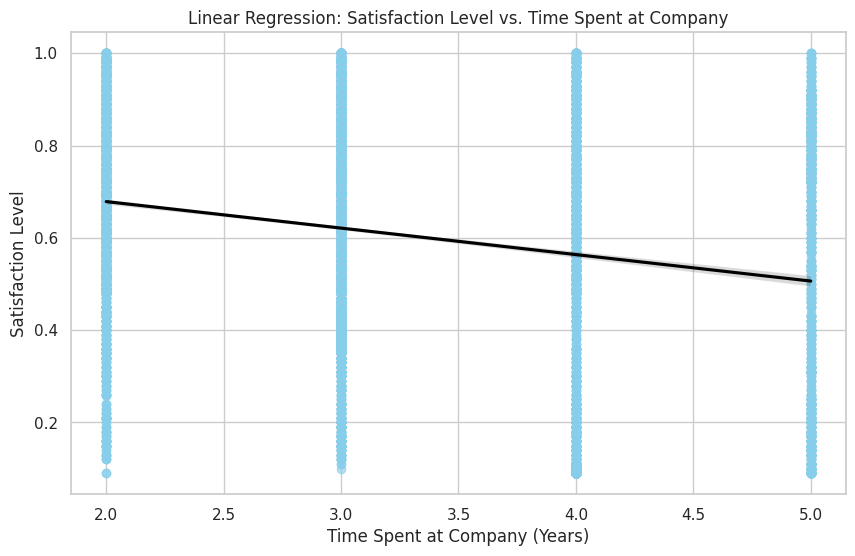

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='time_spend_company',
    y='satisfaction_level',
    data=employee_attr_df,
    line_kws={'color': 'black'},
    scatter_kws={'color': 'skyblue', 'alpha': 0.6}
)
plt.title("Linear Regression: Satisfaction Level vs. Time Spent at Company")
plt.xlabel("Time Spent at Company (Years)")  # Indicating time in years
plt.ylabel("Satisfaction Level")
plt.show()

**Satisfaction Level vs. Number of Project**

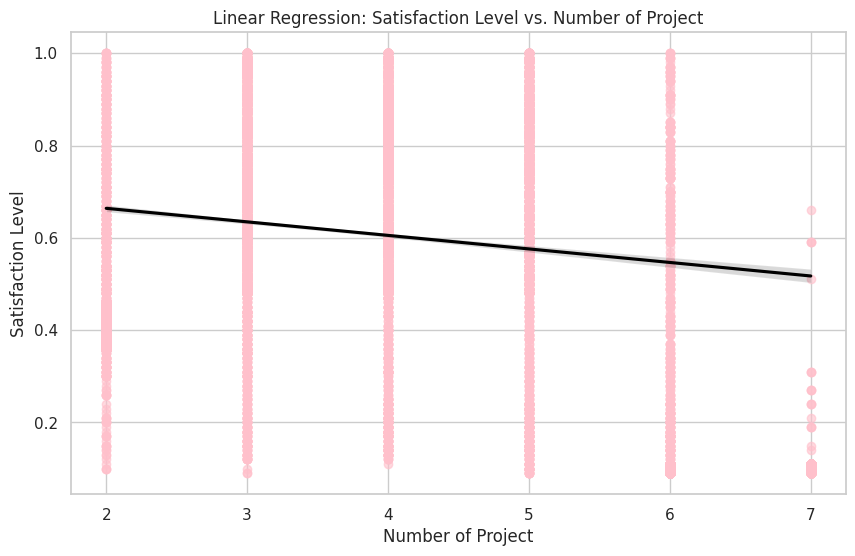

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='number_project',
    y='satisfaction_level',
    data=employee_attr_df,
    line_kws={'color': 'black'},
    scatter_kws={'color': 'pink', 'alpha': 0.6}
)
plt.title("Linear Regression: Satisfaction Level vs. Number of Project")
plt.xlabel("Number of Project")
plt.ylabel("Satisfaction Level")
plt.show()


**Satisfaction Level vs. Last Evaluation**

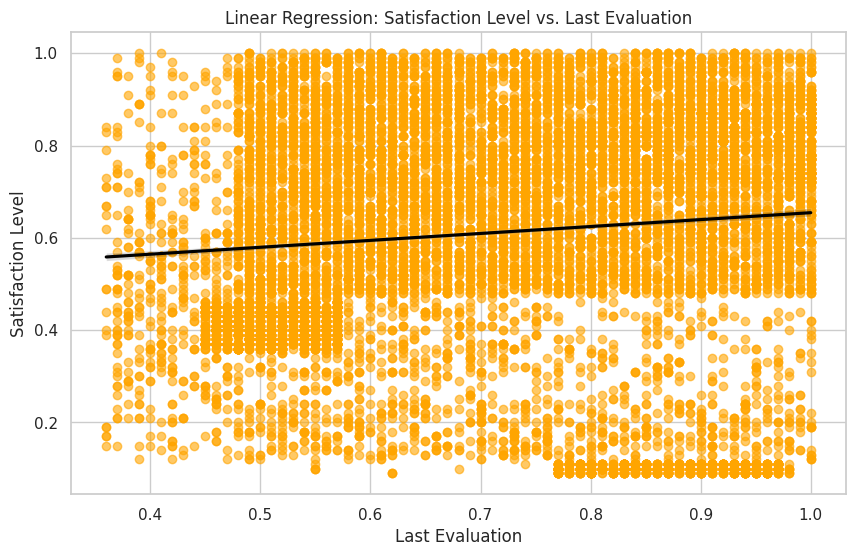

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='last_evaluation',
    y='satisfaction_level',
    data=employee_attr_df,
    line_kws={'color': 'black'},
    scatter_kws={'color': 'orange', 'alpha': 0.6}
)
plt.title("Linear Regression: Satisfaction Level vs. Last Evaluation")
plt.xlabel("Last Evaluation")
plt.ylabel("Satisfaction Level")
plt.show()

The correlation analysis indicates that satisfaction level is weakly influenced by factors such as workload (number of projects, -0.143) and tenure (time spent at the company, -0.101), suggesting that employees handling more projects or spending more years in the company may experience slightly lower satisfaction. Performance evaluations show a minimal positive relationship (0.105) with satisfaction, implying that high ratings have a limited impact on how satisfied employees feel. Similarly, salary shows an almost negligible positive effect (0.050), indicating that compensation alone does not significantly drive satisfaction. Work accident history and recent promotions exhibit very weak positive correlations, further emphasizing that these aspects do not play major roles in job satisfaction.

Overall, the correlation analysis suggests that job satisfaction is only weakly influenced by measurable factors such as workload, tenure, performance evaluations, salary, accident history, and promotions. While employees with more projects or longer tenure may experience slightly lower satisfaction, and performance ratings or compensation provide some motivation, these factors have a limited impact on overall satisfaction. Instead, the results imply that satisfaction depends more on intangible aspects like supportive work culture, role alignment, work-life balance, autonomy, and positive relationships with management. These qualitative elements likely play a larger role in fulfilling intrinsic needs, highlighting that non-quantitative factors are often more influential in driving long-term employee satisfaction.


**3.2 Use cross-tabulation to examine relationships between categorical variables.**

In [ ]:
# Perform cross-tabulation between salary and dept
salary_dept_crosstab = pd.crosstab(employee_attr_df['dept'], employee_attr_df['salary'], margins=True)

# Calculate percentage cross-tabulation
salary_dept_crosstab_percentage = salary_dept_crosstab.div(salary_dept_crosstab.loc["All"], axis=1) * 100

print('The cross-tabulation between salary and dept\n')
print(salary_dept_crosstab)

print('\nThe cross-tabulation percentage between salary and dept\n')
print(salary_dept_crosstab_percentage)

The cross-tabulation between salary and dept

salary       high   low  medium    All
dept                                  
IT             81   572     484   1137
RandD          46   341     348    735
accounting     68   344     300    712
hr             44   324     324    692
management    138   169     181    488
marketing      71   360     334    765
product_mng    57   420     350    827
sales         232  1954    1553   3739
support       133  1064     885   2082
technical     192  1283    1065   2540
All          1062  6831    5824  13717

The cross-tabulation percentage between salary and dept

salary             high         low      medium         All
dept                                                       
IT             7.627119    8.373591    8.310440    8.288984
RandD          4.331450    4.991948    5.975275    5.358315
accounting     6.403013    5.035866    5.151099    5.190639
hr             4.143126    4.743083    5.563187    5.044835
management    12.994350    2.

The cross-tabulation of salary distribution across departments reveals distinct patterns linked to job responsibilities, skills, and organizational hierarchies. Sales and technical roles account for the largest share of employees, with sales representing 27.26% of the workforce and technical roles making up 18.52%. Within the sales department, 28.60% of employees fall into the low-salary category, and 26.67% fall into the medium-salary category, indicating lower base compensation supplemented by performance-based incentives. In contrast, management positions, though comprising only 3.56% of the total workforce, have the highest proportion of high-salary employees (12.99%), reflecting the advanced skills, experience, and strategic decision-making required for these roles. Technical and support departments show a more balanced salary distribution, with technical roles accounting for 18.52% of the workforce, and support roles making up 15.18%, with significant representation across all salary levels. Overall, high salaries are concentrated in managerial roles, while sales (28.60% low and 26.67% medium) and support departments (15.58% low and 15.20% medium) typically offer lower to mid-level salaries, which likely reflects the varying responsibilities and skill sets required across these departments.

**3.3 Conduct regression analysis to investigate dependencies between variables.**

In [ ]:
# Convert salary levels to numeric values
employee_attr_reg_df = employee_attr_df.copy()
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
employee_attr_reg_df['salary'] = employee_attr_reg_df['salary'].map(salary_mapping)

# Drop unecessary columns
regression_df = employee_attr_corr_df.drop(columns=['Emp ID', 'dept'])

# Select dependent and independent variables
X = regression_df.drop(columns='satisfaction_level')  # Independent variables
y = regression_df['satisfaction_level']  # Dependent variable

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression analysis
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     satisfaction_level   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     175.7
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          1.06e-283
Time:                        20:31:00   Log-Likelihood:                 325.50
No. Observations:               13717   AIC:                            -633.0
Df Residuals:                   13708   BIC:                            -565.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

The regression analysis reveals several key insights regarding the factors affecting **Satisfaction Level**. The model has an **R-squared value of 0.093**, indicating that about 9.3% of the variance in satisfaction level is explained by the independent variables. **Last Evaluation** (positive coefficient of 0.2885), **Work Accident** (positive coefficient of 0.0362), and **Promotion in the Last 5 Years** (positive coefficient of 0.0497) all have a statistically significant positive impact on satisfaction level. On the other hand, **Number of Projects** (negative coefficient of -0.0330) and **Time Spent in the Company** (negative coefficient of -0.0537) negatively affect satisfaction. **Average Monthly Hours** has a very small positive coefficient, but its p-value suggests it is not statistically significant. Finally, **Salary** (positive coefficient of 0.0201) also has a significant positive effect, indicating that higher salary levels are associated with higher satisfaction. Overall, while the model highlights several significant predictors, the relatively low R-squared value suggests other unaccounted factors may influence satisfaction level.

The positive impact of **Work Accident** on **Satisfaction Level** may stem from several factors. Employees who experience work accidents may receive compensation, benefits, or insurance payouts, improving their financial situation and, consequently, their job satisfaction. Additionally, the company may offer more support, attention, or safety measures following an accident, making employees feel valued and cared for. In some cases, injured employees might also perceive greater job security due to workers' compensation policies or retention efforts. This combination of financial support, company care, and perceived security can contribute to higher satisfaction levels, despite the accident itself.

Based on the p-values in the OLS Regression Results, last evaluation, number of projects, time spent in company, work accident, promotion in last 5 years, and salary are statistically significant factors influencing the satisfaction level. Average monthly hours, however, is not statistically significant (p > 0.05). This result corresponds to the previous correlation analysis findings.

**3.4 Perform statistical testing to determine significant factors.**

In [ ]:


# Calculate descriptive statistics for satisfaction_level by dept
print("\nDescriptive statistics for satisfaction_level by dept\n")
dept_stats = employee_attr_df.groupby('dept')['satisfaction_level'].describe()
print(dept_stats)


Descriptive statistics for satisfaction_level by dept

              count      mean       std   min    25%    50%   75%  max
dept                                                                  
IT           1137.0  0.616711  0.250022  0.09  0.450  0.660  0.82  1.0
RandD         735.0  0.631510  0.238838  0.09  0.490  0.670  0.82  1.0
accounting    712.0  0.578315  0.255941  0.09  0.400  0.600  0.80  1.0
hr            692.0  0.597673  0.249666  0.09  0.420  0.610  0.80  1.0
management    488.0  0.615676  0.231086  0.09  0.480  0.655  0.79  1.0
marketing     765.0  0.622458  0.243311  0.09  0.450  0.650  0.82  1.0
product_mng   827.0  0.617098  0.242343  0.09  0.445  0.640  0.82  1.0
sales        3739.0  0.611837  0.248830  0.09  0.430  0.640  0.82  1.0
support      2082.0  0.615740  0.247625  0.09  0.440  0.650  0.82  1.0
technical    2540.0  0.607783  0.252353  0.09  0.440  0.640  0.82  1.0


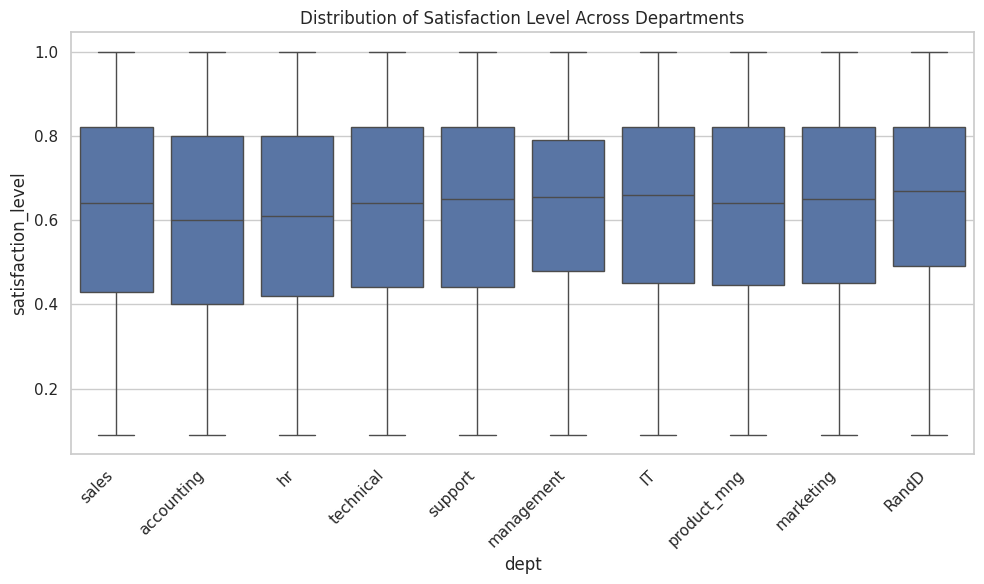

In [ ]:
# Visualize the distribution of satisfaction_level across departments using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='dept', y='satisfaction_level', data=employee_attr_df)
plt.title('Distribution of Satisfaction Level Across Departments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-23-0252a5e6b503>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='dept', y='satisfaction_level', data=employee_attr_df, estimator='mean', ci=None)


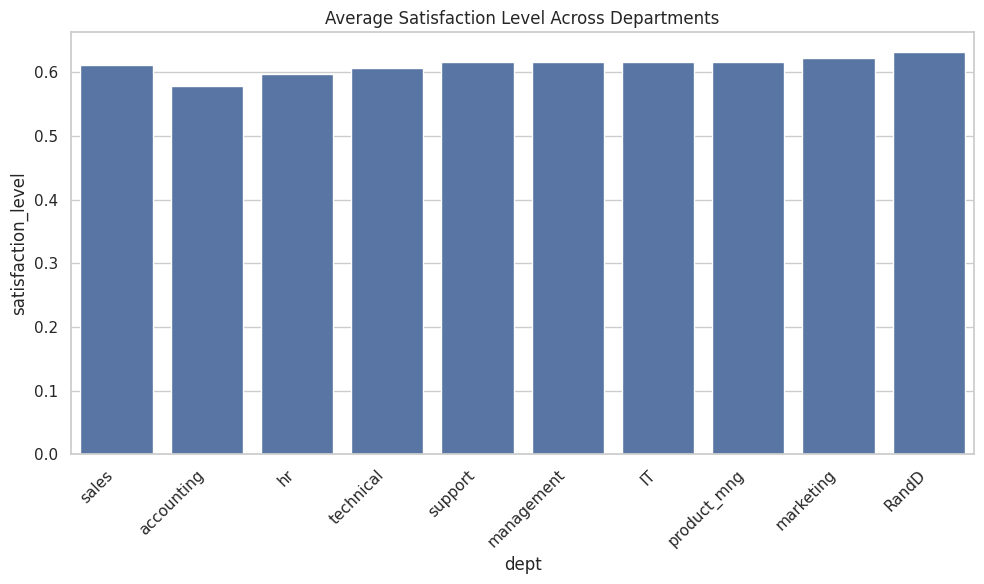

In [ ]:
# Visualize the mean satisfaction_level across departments using a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='dept', y='satisfaction_level', data=employee_attr_df, estimator='mean', ci=None)
plt.title('Average Satisfaction Level Across Departments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Perform one-way ANOVA to test if there's a significant difference in satisfaction_level across departments
anova_result = stats.f_oneway(*[employee_attr_df[employee_attr_df['dept'] == dept]['satisfaction_level']
                                for dept in employee_attr_df['dept'].unique()])
print("\nANOVA result:", anova_result)

# If ANOVA shows a significant result, perform Tukey's HSD test to check pairwise comparisons
if anova_result.pvalue < 0.05:
    tukey_result = pairwise_tukeyhsd(employee_attr_df['satisfaction_level'], employee_attr_df['dept'], alpha=0.05)
    print(tukey_result)


ANOVA result: F_onewayResult(statistic=2.601651211034848, pvalue=0.005356136663269701)
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
         IT       RandD   0.0148 0.9621 -0.0223  0.0519  False
         IT  accounting  -0.0384 0.0397 -0.0759 -0.0009   True
         IT          hr   -0.019 0.8524 -0.0569  0.0188  False
         IT  management   -0.001    1.0 -0.0435  0.0414  False
         IT   marketing   0.0057    1.0 -0.0309  0.0424  False
         IT product_mng   0.0004    1.0 -0.0355  0.0363  False
         IT       sales  -0.0049 0.9999 -0.0314  0.0217  False
         IT     support   -0.001    1.0 -0.0299   0.028  False
         IT   technical  -0.0089 0.9918 -0.0369  0.0191  False
      RandD  accounting  -0.0532 0.0019 -0.0945 -0.0119   True
      RandD          hr  -0.0338 0.2291 -0.0754  0.0077  False
      RandD  management  -0.01

From the ANOVA and Tukey's HSD test results, we can conclude that there are significant differences in satisfaction levels across departments, as indicated by the ANOVA result (p-value = 0.005). Specifically, the Tukey's HSD test highlights that employees in the Accounting department report significantly higher satisfaction compared to those in other departments like IT, RandD, and technical roles. Other notable pairwise comparisons include significant differences between Accounting and Marketing, Sales, and Support, suggesting that satisfaction varies across different organizational functions. However, most other department comparisons, such as between IT and other departments, show no significant differences in satisfaction levels. Thus, while some departments have distinct satisfaction level differences, the overall distribution across departments is relatively balanced with few exceptions.

The observed differences in satisfaction levels across departments, particularly the higher satisfaction reported in Accounting compared to IT, RandD, and technical roles, can likely be attributed to several factors. Accounting roles may involve more routine tasks, clear expectations, and fewer stressors compared to departments like IT and technical roles, which often face high-pressure deadlines and complex problem-solving scenarios. Additionally, departments like IT and RandD may have higher demands for specialized skills and long hours, leading to potential job dissatisfaction. On the other hand, Accounting employees might experience a more predictable work environment, fostering greater job satisfaction.

The significant differences between Accounting and departments such as Marketing, Sales, and Support could stem from the nature of the work. Marketing and Sales often involve meeting aggressive performance targets and dealing with customer-facing pressures, which may lower satisfaction, while roles in Support departments may include high emotional labor, contributing to potential dissatisfaction. In contrast, Accounting roles may offer greater job stability and fewer external pressures, leading to more positive experiences.

Furthermore, the lack of significant differences in satisfaction between many departments (e.g., IT and technical roles) may indicate a general trend where employees across different functional areas have similar workplace challenges or enjoy comparable job conditions. This highlights that satisfaction levels can be influenced by a variety of internal (workload, expectations) and external (management, departmental goals) factors.

**Part 4. Predictive Analytics**

**4.1 predict the satisfaction_level based on the features last_evaluation, number_project, and time_spend_company**

We train three models:

* Linear Regression: A basic model that assumes a linear relationship between the features and the target.
* Random Forest Regressor: A tree-based model that can handle non-linear relationships and interactions between features.
* XGBoost Regressor: An advanced gradient-boosting model that tends to outperform other models, especially in structured datasets.

Model Evaluation:

* MAE (Mean Absolute Error): Measures the average magnitude of errors in a set of predictions, without considering their direction.
* MSE (Mean Squared Error): Similar to MAE but gives more weight to larger errors.
* R² (Coefficient of Determination): Measures the proportion of variance in the target variable that is predictable from the features.

Linear Regression - MAE: 0.2024, MSE: 0.0566, R2: 0.0865


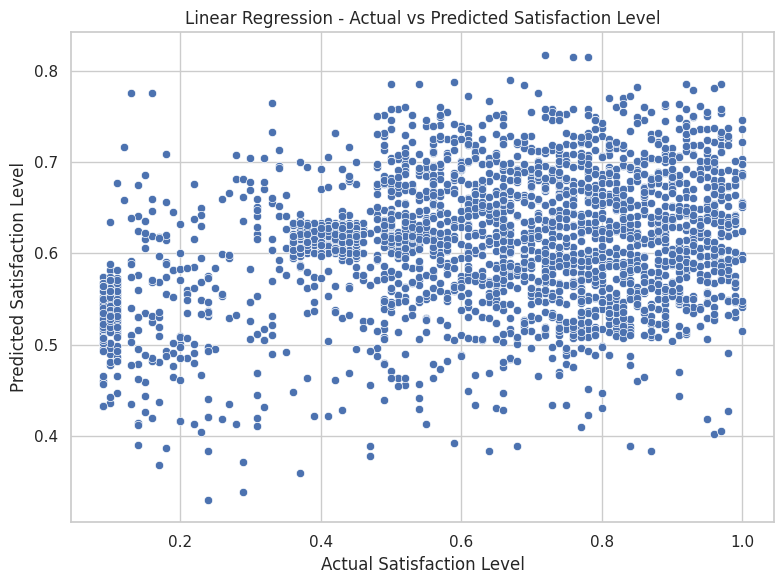

Random Forest - MAE: 0.1384, MSE: 0.0352, R2: 0.4314


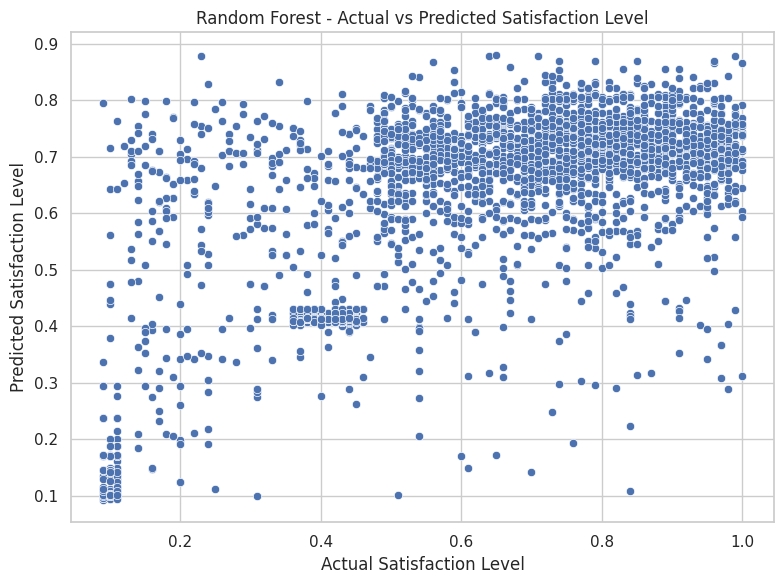

XGBoost - MAE: 0.1368, MSE: 0.0342, R2: 0.4483


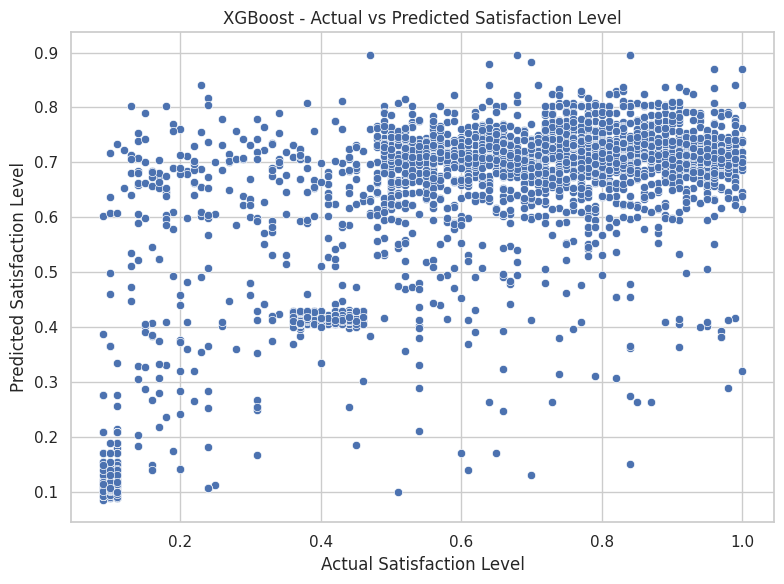

Model Comparison:
      Linear Regression  Random Forest   XGBoost
MAE           0.202415       0.138427  0.136769
MSE           0.056565       0.035212  0.034162
R2            0.086535       0.431361  0.448314


In [ ]:
# 1. Prepare the data
X = employee_attr_df[['last_evaluation', 'number_project', 'time_spend_company']]  # Features
y = employee_attr_df['satisfaction_level']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

# 3. Train, test, and evaluate the models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }

    # Print the results
    print(f"{model_name} - MAE: {mae:.4f}, MSE: {mse:.4f}, R2: {r2:.4f}")

    # Visualize the predictions vs actual
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.title(f'{model_name} - Actual vs Predicted Satisfaction Level')
    plt.xlabel('Actual Satisfaction Level')
    plt.ylabel('Predicted Satisfaction Level')
    plt.tight_layout()
    plt.show()

# 4. Compare model performance
results_df = pd.DataFrame(results)
print("Model Comparison:\n", results_df)

# 5. Interpretation
# Based on the model evaluation metrics, we can identify the best-performing model in terms of R2, MAE, and MSE.


From the model comparison results, we can conclude that the **XGBoost** model performs the best in predicting employee satisfaction level, as it has the highest R² (0.448) and the lowest MAE (0.1368) and MSE (0.0342), indicating that it explains the most variance in satisfaction and makes the most accurate predictions. The **Random Forest** model also performs well, with a slightly lower R² (0.431) but still significantly better than **Linear Regression** (R² of 0.0865). The **Linear Regression** model, while providing a baseline, performs the worst in terms of prediction accuracy, as reflected by its much lower R² and higher error metrics. Therefore, **XGBoost** is the most effective model for this task, followed by **Random Forest**, with **Linear Regression** being less suitable for this problem.

**4.2 Predict average_monthly_hours and last_evaluation based on number_project.**

We train three models:

* Linear Regression: A basic model that assumes a linear relationship between the features and the target.
* Random Forest Regressor: A tree-based model that can handle non-linear relationships and interactions between features.
* XGBoost Regressor: An advanced gradient-boosting model that tends to outperform other models, especially in structured datasets.

Model Evaluation:

* MAE (Mean Absolute Error): Measures the average magnitude of errors in a set of predictions, without considering their direction.
* MSE (Mean Squared Error): Similar to MAE but gives more weight to larger errors.
* R² (Coefficient of Determination): Measures the proportion of variance in the target variable that is predictable from the features.

In [ ]:
# Define feature and target variables
X = employee_attr_df[['number_project']]  # Predictor variable
y_avg_monthly_hours = employee_attr_df['average_monthly_hours']  # Target variable 1
y_last_evaluation = employee_attr_df['last_evaluation']  # Target variable 2

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train_avg, y_test_avg = train_test_split(X, y_avg_monthly_hours, test_size=0.2, random_state=42)
X_train, X_test, y_train_eval, y_test_eval = train_test_split(X, y_last_evaluation, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor()
}

# Initialize dictionaries to store results
results_avg_monthly_hours = {}
results_last_evaluation = {}

# Train and evaluate models for predicting average_monthly_hours
for model_name, model in models.items():
    model.fit(X_train, y_train_avg)
    y_pred_avg = model.predict(X_test)

    # Evaluation metrics for average_monthly_hours
    mae_avg = mean_absolute_error(y_test_avg, y_pred_avg)
    mse_avg = mean_squared_error(y_test_avg, y_pred_avg)
    r2_avg = r2_score(y_test_avg, y_pred_avg)

    # Store results
    results_avg_monthly_hours[model_name] = {'MAE': mae_avg, 'MSE': mse_avg, 'R2': r2_avg}

# Train and evaluate models for predicting last_evaluation
for model_name, model in models.items():
    model.fit(X_train, y_train_eval)
    y_pred_eval = model.predict(X_test)

    # Evaluation metrics for last_evaluation
    mae_eval = mean_absolute_error(y_test_eval, y_pred_eval)
    mse_eval = mean_squared_error(y_test_eval, y_pred_eval)
    r2_eval = r2_score(y_test_eval, y_pred_eval)

    # Store results
    results_last_evaluation[model_name] = {'MAE': mae_eval, 'MSE': mse_eval, 'R2': r2_eval}

# Print results for both targets
print("Results for predicting Average Monthly Hours:")
for model_name, metrics in results_avg_monthly_hours.items():
    print(f"{model_name}: MAE = {metrics['MAE']}, MSE = {metrics['MSE']}, R2 = {metrics['R2']}")

print("\nResults for predicting Last Evaluation:")
for model_name, metrics in results_last_evaluation.items():
    print(f"{model_name}: MAE = {metrics['MAE']}, MSE = {metrics['MSE']}, R2 = {metrics['R2']}")


Results for predicting Average Monthly Hours:
Linear Regression: MAE = 37.34221136031805, MSE = 2005.0056890129488, R2 = 0.2007187013082251
Random Forest: MAE = 36.3422498487727, MSE = 1930.12019078736, R2 = 0.23057127409787903
XGBoost: MAE = 36.339528092142444, MSE = 1930.4910578725, R2 = 0.23042343056452785

Results for predicting Last Evaluation:
Linear Regression: MAE = 0.1343218062134111, MSE = 0.025188241021405836, R2 = 0.1345019120972858
Random Forest: MAE = 0.12889441319707742, MSE = 0.02385652295518578, R2 = 0.18026133765461005
XGBoost: MAE = 0.1289204144417023, MSE = 0.023857529360164848, R2 = 0.1802267563758181


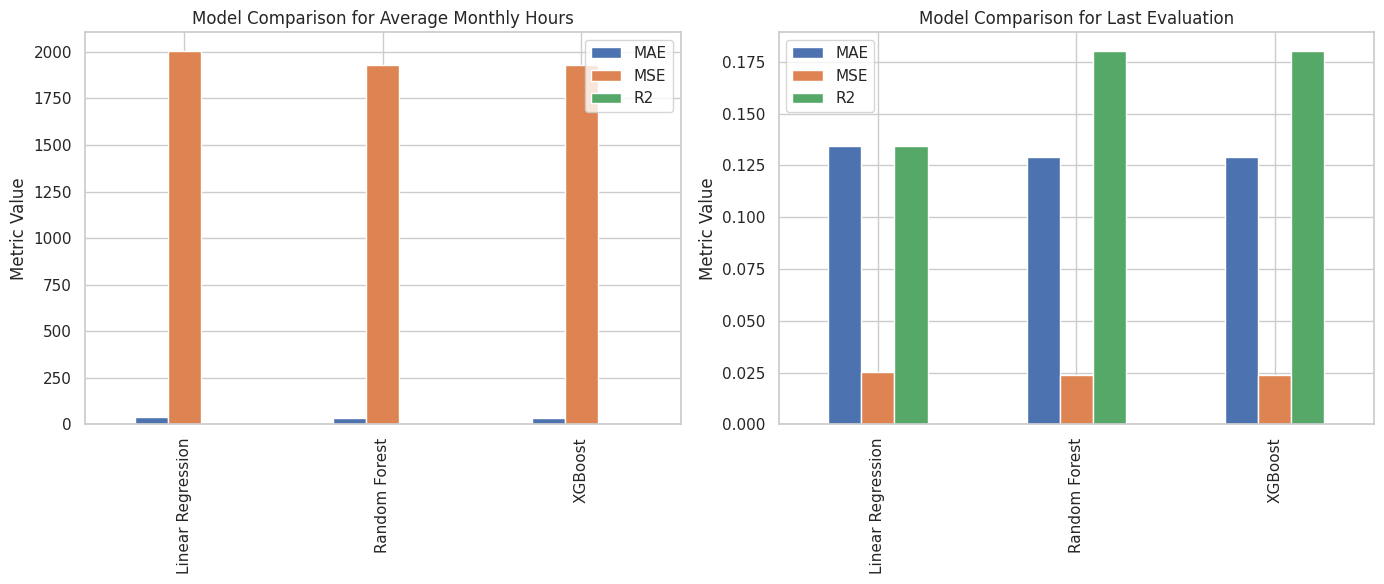

In [ ]:
# Convert results to DataFrame for easier visualization
results_avg_df = pd.DataFrame(results_avg_monthly_hours).T
results_eval_df = pd.DataFrame(results_last_evaluation).T

# Plotting MAE, MSE, R² for both targets
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot results for Average Monthly Hours
results_avg_df[['MAE', 'MSE', 'R2']].plot(kind='bar', ax=axes[0], title="Model Comparison for Average Monthly Hours")
axes[0].set_ylabel("Metric Value")

# Plot results for Last Evaluation
results_eval_df[['MAE', 'MSE', 'R2']].plot(kind='bar', ax=axes[1], title="Model Comparison for Last Evaluation")
axes[1].set_ylabel("Metric Value")

plt.tight_layout()
plt.show()


From the results of the predictive models for both **Average Monthly Hours** and **Last Evaluation**, we can conclude that Random Forest and XGBoost perform similarly, with slightly better accuracy compared to Linear Regression in terms of MAE, MSE, and R². Specifically, for predicting **Average Monthly Hours**, Random Forest and XGBoost yield an R² of around 0.23, indicating a modest fit to the data. In comparison, the **Last Evaluation** predictions show a similar pattern, with Random Forest and XGBoost outperforming Linear Regression slightly (R² of around 0.18 vs. 0.13). While these models do not achieve high R² values, they still provide useful insights into the relationship between the independent variables and the target variables. The models' performance suggests that there may be other factors influencing **Average Monthly Hours** and **Last Evaluation** that are not captured by the features used in these models.

**Part 5. Interpretation and Insights**

#### **Skewness and Kurtosis Observations**

The skewness and kurtosis analysis reveals that while most variables in the dataset are relatively close to being normally distributed, certain variables exhibit extreme skewness and kurtosis values. Notably, *Work Accident* and *Promotion in the Last 5 Years* show high skewness and kurtosis, which reflect the rarity of such events in the workplace. For example, the skewness of *Promotion in the Last 5 Years* (7.36) indicates that most employees do not receive promotions, but there are a few employees who have been promoted multiple times. These high kurtosis values indicate the presence of extreme outliers in these variables. This suggests that promotions and accidents are significant but infrequent events in the workplace, which may warrant special attention when analyzing their impact on employee satisfaction.

#### **Frequency Distributions of Categorical Variables**

The categorical analysis highlights interesting patterns in employee distribution by departments and salary levels. It is noteworthy that *Sales* and *Technical* departments have the highest numbers of employees, while roles in *Management* and *HR* are less populated. This likely reflects the operational structure of the organization, with a focus on customer-facing, technical, and support functions.

The salary distribution analysis reveals that the majority of employees fall into the *low* salary category, with only a small proportion in the *high* salary category. This distribution suggests that higher salaries are reserved for specialized or senior roles, while most employees occupy positions with lower pay scales. This salary structure might be contributing to job satisfaction, as employees in the lower salary categories report lower satisfaction, indicating that pay is still a major determinant of overall satisfaction.

#### **Department-Level Satisfaction**

The analysis of satisfaction levels by department reveals that employees in departments like *R&D* and *Marketing* report higher satisfaction compared to those in *Accounting* or *HR*. This could be explained by the nature of the work and working environment in these departments. *R&D* employees, for example, may find their work more engaging and rewarding due to the innovative nature of their roles. On the other hand, *Accounting* and *HR* might involve more routine tasks, which could lead to a relatively lower level of satisfaction due to perceived monotony or lack of engagement.

The satisfaction level by salary shows a clear trend: employees in the *high* salary category tend to report higher satisfaction, while those in the *low* salary category report lower satisfaction. This correlation emphasizes the importance of competitive compensation in boosting morale and job satisfaction, particularly among employees who may otherwise feel undervalued.

#### **Correlation Analysis**

The weak correlations between job satisfaction and factors such as *Workload*, *Tenure*, *Performance Evaluations*, and *Salary* suggest that satisfaction is influenced more by intrinsic factors than external or measurable variables. While there is a slight negative correlation with workload (number of projects) and tenure (time spent at the company), this suggests that employees with more responsibilities or longer tenures may experience diminishing returns on job satisfaction. However, these relationships are weak, which indicates that other factors are likely driving employee contentment.

**Intangible aspects**, such as organizational culture, autonomy, work-life balance, and management relationships, may play a more prominent role in determining overall job satisfaction. While compensation and career progression (e.g., promotions, evaluations) are relevant, they appear to have a limited impact compared to the qualitative aspects of work life.

#### **Cross-Tabulation Analysis**

The cross-tabulation analysis provides additional insights into how different departments and salary categories correlate with employee satisfaction. For instance, *Sales* and *Technical* departments have significant portions of employees in the *low* and *medium* salary ranges, indicating that while these employees are plentiful, they may not receive the same compensation or benefits as those in managerial roles. This could create disparities in satisfaction levels across departments, as employees in lower salary categories report lower satisfaction.

Interestingly, *Management* positions, though fewer in number, report the highest levels of satisfaction. This could be due to the high compensation packages and seniority associated with these roles, which often come with greater job security and more autonomy. Furthermore, employees in managerial positions may also benefit from a greater sense of accomplishment and influence within the organization, contributing to higher satisfaction.

#### **Regression Analysis**

The regression analysis confirms that factors like *Last Evaluation*, *Work Accident*, and *Promotion in the Last 5 Years* positively influence employee satisfaction. Despite the low R-squared value of 0.093, indicating that only a small portion of satisfaction is explained by the model, the significant predictors offer useful insights. The positive impact of *Last Evaluation* on satisfaction suggests that employees who receive favorable evaluations are more likely to feel valued and satisfied. Similarly, the positive coefficients for *Work Accident* and *Promotion in Last 5 Years* suggest that these events, while rare, can significantly boost employee morale, likely due to the tangible benefits and recognition they bring.

Interestingly, *Number of Projects* and *Time Spent at the Company* show negative coefficients, suggesting that employees who are burdened with more projects or who have spent longer in the company may experience lower satisfaction. This could indicate burnout or a lack of growth opportunities after long periods in the same role, which might lead to stagnation or frustration.

#### **Statistical Testing: Departmental Differences**

The ANOVA and Tukey’s HSD test results reveal significant differences in satisfaction levels across departments, with notable variations between *Accounting* and other departments. These differences may reflect variations in workload, expectations, and departmental culture. For instance, departments like *Sales* and *Support* often face higher stress levels due to customer-facing roles, which may lead to lower satisfaction, whereas employees in *Accounting* roles may enjoy more predictable hours and tasks, fostering a more satisfied workforce.

#### **Conclusion and Real-World Implications**

The findings suggest that while measurable factors such as salary, performance evaluations, and tenure play a role in employee satisfaction, **intrinsic factors**—such as work culture, autonomy, and job alignment—are likely to have a stronger influence. Organizations should focus on fostering a positive work environment, offering growth opportunities, and ensuring that employees feel valued and recognized for their contributions. Moreover, addressing disparities between departments and salary groups can help create a more equitable and satisfying work environment for all employees.

Ultimately, this analysis emphasizes the need for organizations to consider both **quantitative** factors (e.g., salary, performance) and **qualitative** aspects (e.g., work culture, autonomy) when developing strategies to enhance employee satisfaction and retention. By focusing on these areas, companies can build a more engaged and motivated workforce, leading to higher productivity and better long-term outcomes.